# 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

# 파일 불러오기

In [2]:
order_origin = pd.read_csv('data/orders.csv')
pizza_type_origin = pd.read_csv('data/pizza_types.csv')
pizza_origin = pd.read_csv('data/pizzas.csv')

In [3]:
order = order_origin.copy()
pizza_type = pizza_type_origin.copy()
pizza = pizza_origin.copy()

In [4]:
order.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity
0,1,2023-01-01 11:45:11,1,hawaiian_m,1
1,2,2023-01-01 11:53:26,2,big_meat_l,1
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1
3,2,2023-01-01 11:53:26,4,five_cheese_l,1
4,2,2023-01-01 11:53:26,5,potato_m,1


In [5]:
pizza_type.head()

,pizza_name,category,ingredients
0,바비큐 치킨 피자,치킨,"치킨, 피망, 토마토, 적양파, 바비큐 소스"
1,타이 치킨 피자,치킨,"치킨, 파인애플, 토마토, 피망, 타이 칠리 소스"
2,빅 미트 피자,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
3,클래식 디럭스 피자,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
4,슈퍼 슈프림 피자,클래식,"페퍼로니, 토마토, 적양파, 그린 올리브, 옥수수, 마늘"


In [6]:
pizza.head()

,pizza_id,pizza_name,size,price
0,bbq_ckn_s,바비큐 치킨 피자,S,11300
1,bbq_ckn_m,바비큐 치킨 피자,M,22000
2,bbq_ckn_l,바비큐 치킨 피자,L,34000
3,thai_ckn_s,타이 치킨 피자,S,12300
4,thai_ckn_m,타이 치킨 피자,M,24000


In [7]:
print(order.shape)
print(pizza_type.shape)
print(pizza.shape)

(47079, 5)
(13, 3)
(39, 4)


In [8]:
pizza_type.shape[0] * 3 == pizza.shape[0]
# 피자 종류는 총 13개에 사이즈 스몰, 미디움, 라지 해서 총 39개의 주문 가능한 종류가 나온다

True

# 데이터 병합 및 데이터 탐색

In [9]:
order_pizza = order.merge(pizza, on='pizza_id', how='left')
df = order_pizza.merge(pizza_type, on='pizza_name', how='left')

In [10]:
df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,price,category,ingredients
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈"
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈"


In [11]:
# 상세 주문 별 매출
df['sales'] = df['quantity'] * df['price']
# 그냥 주문 별 매출은 컬럼에 추가하지 않고 나중에 계산한다

In [12]:
df.shape

(47079, 11)

In [13]:
df.info()
# 결측값 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47079 entries, 0 to 47078
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          47079 non-null  int64 
 1   order_timestamp   47079 non-null  object
 2   order_details_id  47079 non-null  int64 
 3   pizza_id          47079 non-null  object
 4   quantity          47079 non-null  int64 
 5   pizza_name        47079 non-null  object
 6   size              47079 non-null  object
 7   price             47079 non-null  int64 
 8   category          47079 non-null  object
 9   ingredients       47079 non-null  object
 10  sales             47079 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.0+ MB


In [14]:
df.describe(include='all')

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,price,category,ingredients,sales
count,47079.000000,47079,47079.000000,47079,47079.000000,47079,47079,47079.000000,47079,47079,47079.000000
unique,NaN,21350,NaN,39,NaN,13,3,NaN,4,13,NaN
top,NaN,2023-11-18 21:10:53,NaN,thai_ckn_l,NaN,하와이안 피자,L,NaN,클래식,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",NaN
freq,NaN,19,NaN,2495,NaN,5909,18378,NaN,17437,5909,NaN
mean,10708.712058,NaN,23540.000000,NaN,1.052996,NaN,NaN,22945.597825,NaN,NaN,24233.356698
std,6175.450615,NaN,13590.680998,NaN,0.242338,NaN,NaN,9376.523771,NaN,NaN,11887.470629
min,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,9300.000000,NaN,NaN,9300.000000
25%,5352.500000,NaN,11770.500000,NaN,1.000000,NaN,NaN,11300.000000,NaN,NaN,12300.000000
50%,10696.000000,NaN,23540.000000,NaN,1.000000,NaN,NaN,21800.000000,NaN,NaN,22000.000000
75%,16100.500000,NaN,35309.500000,NaN,1.000000,NaN,NaN,32300.000000,NaN,NaN,33800.000000


In [15]:
df['order_timestamp'] = pd.to_datetime(df['order_timestamp'])
df.dtypes

order_id                     int64
order_timestamp     datetime64[ns]
order_details_id             int64
pizza_id                    object
quantity                     int64
pizza_name                  object
size                        object
price                        int64
category                    object
ingredients                 object
sales                        int64
dtype: object

In [16]:
print(f"데이터 내 주문시각 최소값 : {df['order_timestamp'].unique().min()}")
print(f"데이터 내 주문시각 최대값 : {df['order_timestamp'].unique().max()}")
# 2023년 한 해 동안의 주문 데이터이다.

데이터 내 주문시각 최소값 : 2023-01-01 11:45:11
데이터 내 주문시각 최대값 : 2023-12-31 21:56:56


# Data Analysis

## 매장 분석

In [17]:
total_days = df['order_timestamp'].dt.date.nunique()
print(f'영업일 수: {total_days}일')

영업일 수: 358일


In [18]:
total_sales = df['sales'].sum()
print(f'총매출: {total_sales:,.0f}원')
# 총 11억 4천 8십 8만 2천 2백원 팔렸다.

총매출: 1,140,882,200원


In [19]:
sales_per_day = total_sales / total_days
print(f'하루 평균 매출: {sales_per_day:,.0f}원')

하루 평균 매출: 3,186,822원


In [20]:
total_orders = df['order_id'].nunique()
print(f'주문 횟수: {total_orders:,.0f}회')
# 총 21350 팀이 주문했다.

주문 횟수: 21,350회


In [21]:
avg_purchase_price = total_sales / total_orders
print(f'평균 주문 금액: {avg_purchase_price:,.0f}원')

평균 주문 금액: 53,437원


In [22]:
total_quantity = df['quantity'].sum()
print(f'총판매량: {total_quantity:,.0f}판')

총판매량: 49,574판


In [23]:
# 한 주문에 피자 최대 몇판 팔았는가
df.groupby('order_id')['quantity'].sum().sort_values(ascending=False).head()

order_id
18845    28
10760    25
18513    15
21158    15
20163    15
Name: quantity, dtype: int64

In [24]:
len(df['pizza_name'].unique()) == pizza_type.shape[0]
# 가게에서 주문가능한 모든 종류의 피자가 다 팔린다.

True

## 월별 매출, 요일별 매출, 시간대별 매출

### 월별 매출

In [25]:
def sales_distribution(col, cum = False):
    col_sales = df.groupby(col)['sales'].sum().reset_index().sort_values(col)
    
    if cum: col_sales = df.groupby('month')['sales'].sum().cumsum().reset_index()  # 월별 누적합을 구하고 싶을 때 cum=True옵션 준다.
        
    col_sales['sales'] = col_sales['sales']/1000000
    sns.lineplot(data=col_sales, x=col, y='sales', errorbar=None, marker="o")
    for i in range(col_sales.shape[0]):
        color = 'red' if col_sales['sales'][i] == col_sales['sales'].max() else 'black'
        plt.text(col_sales[col][i], col_sales['sales'][i], f"{col_sales['sales'][i]:.2f}", 
                 horizontalalignment='center', verticalalignment='bottom', color=color)
    plt.ylabel("매출(백만원)")
    plt.show()

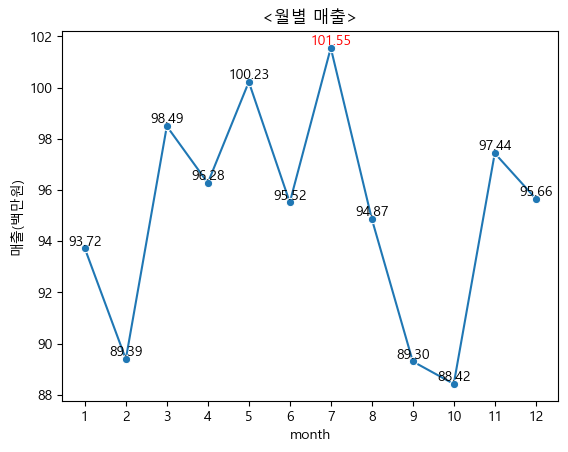

In [26]:
df['month'] = df['order_timestamp'].dt.month
plt.title("<월별 매출>")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
sales_distribution('month')

### 요일별 매출

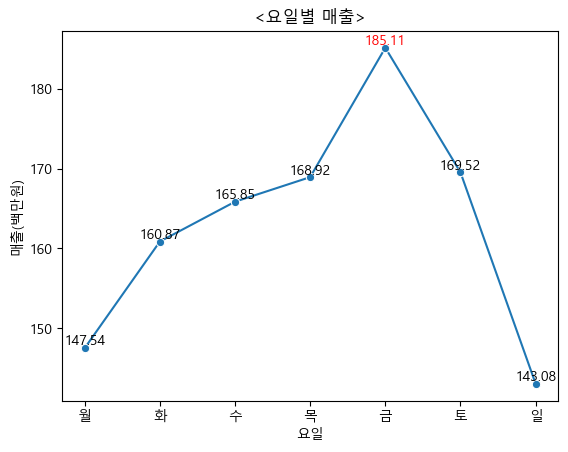

In [27]:
df['day_name'] = df['order_timestamp'].dt.weekday 
# day_name으로 하니 영어로 나오는데 시각화할때 순서를 지정하는게 어렵다. 결과가 숫자로 나오는 weekday속성을 사용하는게 나았다.
plt.title("<요일별 매출>")
plt.xticks(ticks=range(7), labels=["월", "화", "수", "목", "금", "토", "일"])  # ticks를 지정하지 않고 labels를 설정할 수 없다.
plt.xlabel("요일")
sales_distribution('day_name')

### 시간대별 매출

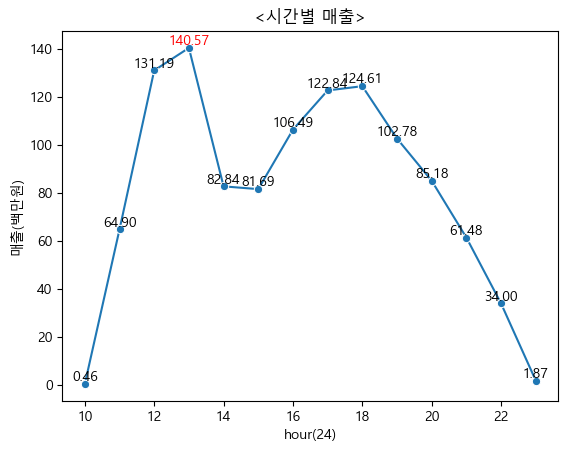

In [28]:
df['hour'] = df['order_timestamp'].dt.hour
plt.title("<시간별 매출>")
plt.xlabel("hour(24)")
sales_distribution('hour')

### 휴일, 평일 시간대별 매출

In [29]:
df['type_of_day'] = df['day_name'].apply(lambda x: '휴일' if x >= 5 else '평일')
df['type_of_day']

0        휴일
1        휴일
2        휴일
3        휴일
4        휴일
         ..
47074    휴일
47075    휴일
47076    휴일
47077    휴일
47078    휴일
Name: type_of_day, Length: 47079, dtype: object

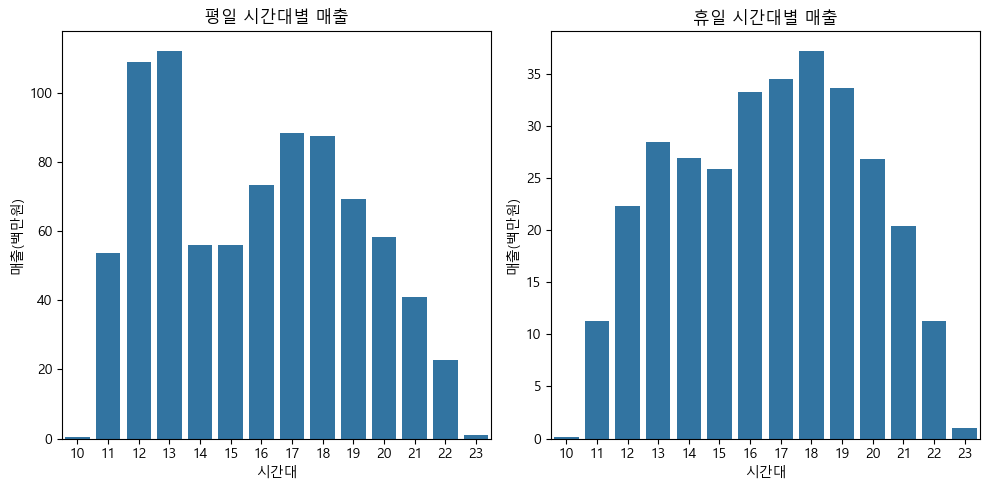

In [30]:
sales_by_day_hour = df.groupby(['type_of_day', 'hour'])['sales'].sum().reset_index()
sales_by_day_hour.sales = sales_by_day_hour.sales / 1000000

day_types = ['평일', '휴일']

plt.figure(figsize = (10, 5))

for i, day_type in enumerate(day_types, 1):
    plt.subplot(1, 2, i)
    target_data = sales_by_day_hour[sales_by_day_hour['type_of_day'] == day_type]
    sns.barplot(data=target_data, x='hour', y='sales')
    plt.title(f'{day_type} 시간대별 매출')
    plt.xlabel('시간대')
    plt.ylabel('매출(백만원)')

plt.tight_layout()
plt.show()

## 메뉴에 따른 판매량 분석

### 피자 메뉴별 판매량

In [31]:
quantity_by_pizza  = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)
quantity_by_pizza.head()
# 판매된 양 순위

,pizza_name,quantity
12,하와이안 피자,6316
9,페퍼로니 피자,6291
7,타이 치킨 피자,5432
6,클래식 디럭스 피자,4691
3,빅 미트 피자,4145


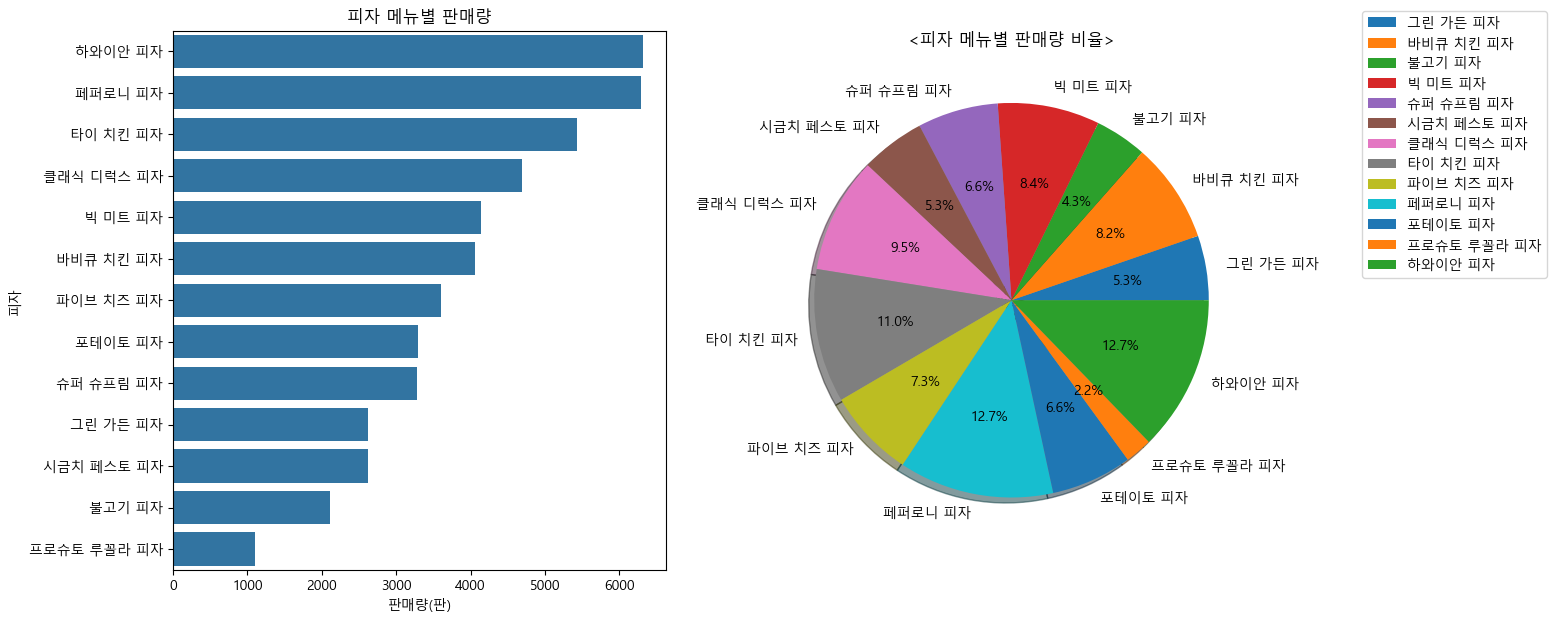

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=quantity_by_pizza, x='quantity', y='pizza_name')
plt.title('피자 메뉴별 판매량')
plt.xlabel('판매량(판)')
plt.ylabel('피자')

plt.subplot(1, 2, 2)
plt.pie(df.groupby('pizza_name')['quantity'].sum(), labels=df.groupby('pizza_name')['quantity'].sum().index, autopct="%1.1f%%", shadow=True)
plt.title('<피자 메뉴별 판매량 비율>')
plt.legend(labels=df.groupby('pizza_name')['quantity'].sum().index, loc="upper right", bbox_to_anchor=(1.6, 1.1)) # bbox_to_anchor로 차트 바깥에 위치시키기
plt.show()

plt.tight_layout()
plt.show()
# 하와이안피자, 페퍼로니 피자 타이 치킨 피자가 상위 3개 메뉴

### 각 피자메뉴 월별 판매량

In [33]:
quantity_by_pizza_and_month = df.groupby(['pizza_name', 'month'])['quantity'].sum().reset_index()
quantity_by_pizza_and_month

,pizza_name,month,quantity
0,그린 가든 피자,1,222
1,그린 가든 피자,2,212
2,그린 가든 피자,3,267
3,그린 가든 피자,4,209
4,그린 가든 피자,5,233
...,...,...,...
151,하와이안 피자,8,538
152,하와이안 피자,9,498
153,하와이안 피자,10,473
154,하와이안 피자,11,533


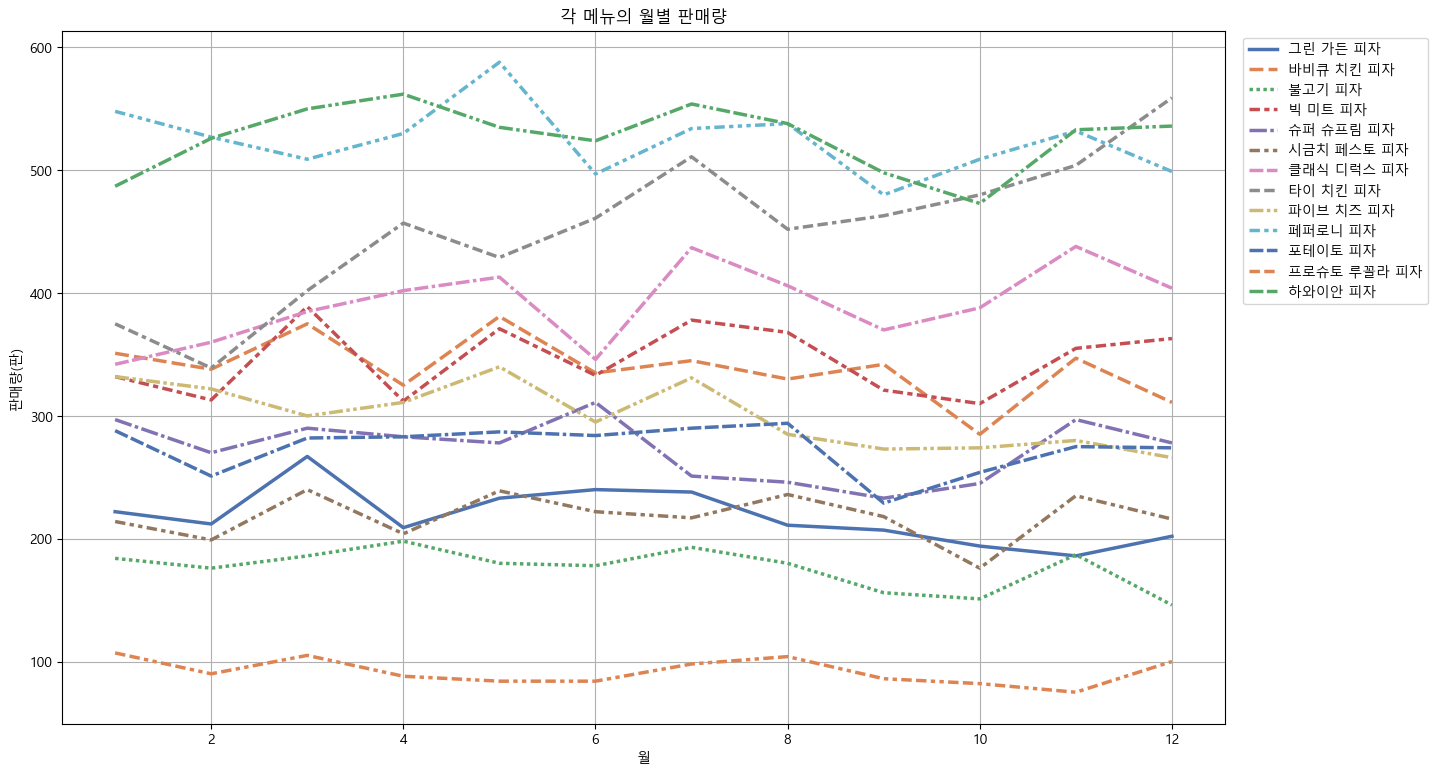

In [34]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=quantity_by_pizza_and_month, x='month', y='quantity', hue='pizza_name', style='pizza_name', palette='deep', linewidth=2.5)
plt.title('각 메뉴의 월별 판매량')
plt.xlabel('월')
plt.ylabel('판매량(판)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.show()

### 사이즈별 판매량

In [35]:
quantity_by_pizza_and_size = df.groupby(['pizza_name', 'size'])['quantity'].sum().reset_index()
quantity_by_pizza_and_size.head(3)

,pizza_name,size,quantity
0,그린 가든 피자,L,746
1,그린 가든 피자,M,884
2,그린 가든 피자,S,991


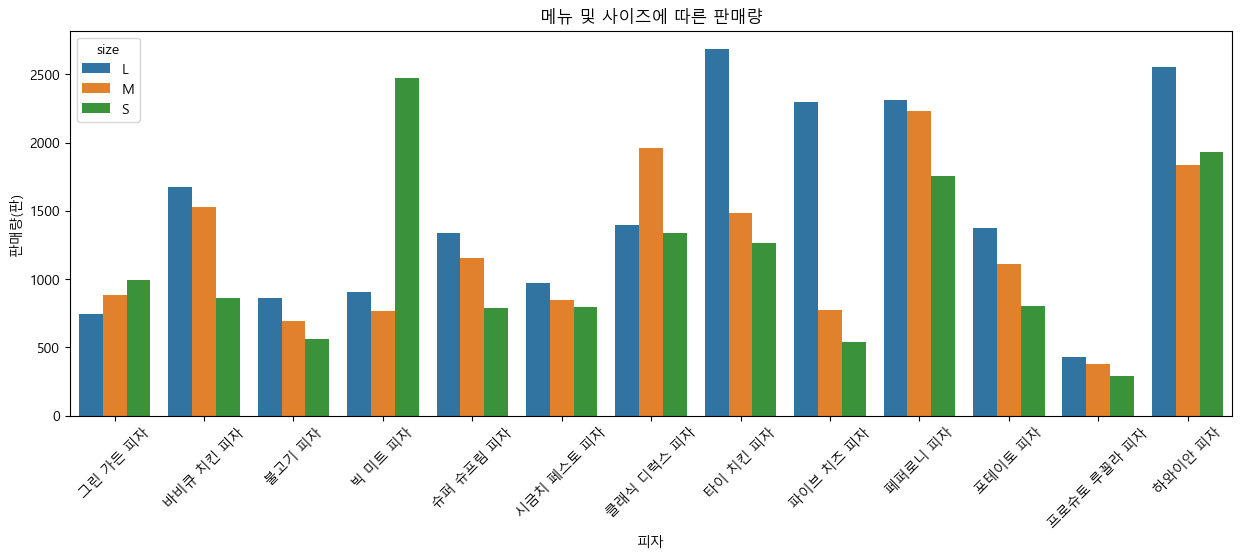

In [36]:
plt.figure(figsize=(15, 5))
sns.barplot(data=quantity_by_pizza_and_size, x='pizza_name', y='quantity', hue='size')
plt.title('메뉴 및 사이즈에 따른 판매량')
plt.xticks(rotation=45)
plt.xlabel('피자')
plt.ylabel('판매량(판)')
plt.show()

## 카테고리별 판매량

In [37]:
df.groupby('category')['pizza_name'].nunique()

category
베지테리언    3
스페셜      4
치킨       2
클래식      4
Name: pizza_name, dtype: int64

In [38]:
# 카테고리별 피자 종류의 개수가 동일하지 않으니 카테고리와 피자메뉴도 같이 봐야 한다.
quantity_by_category_pizza = df.groupby(['category', 'pizza_name'])['quantity'].sum().reset_index()
quantity_by_category_pizza

,category,pizza_name,quantity
0,베지테리언,그린 가든 피자,2621
1,베지테리언,시금치 페스토 피자,2616
2,베지테리언,파이브 치즈 피자,3609
3,스페셜,불고기 피자,2115
4,스페셜,포테이토 피자,3291
5,스페셜,프로슈토 루꼴라 피자,1103
6,스페셜,하와이안 피자,6316
7,치킨,바비큐 치킨 피자,4065
8,치킨,타이 치킨 피자,5432
9,클래식,빅 미트 피자,4145


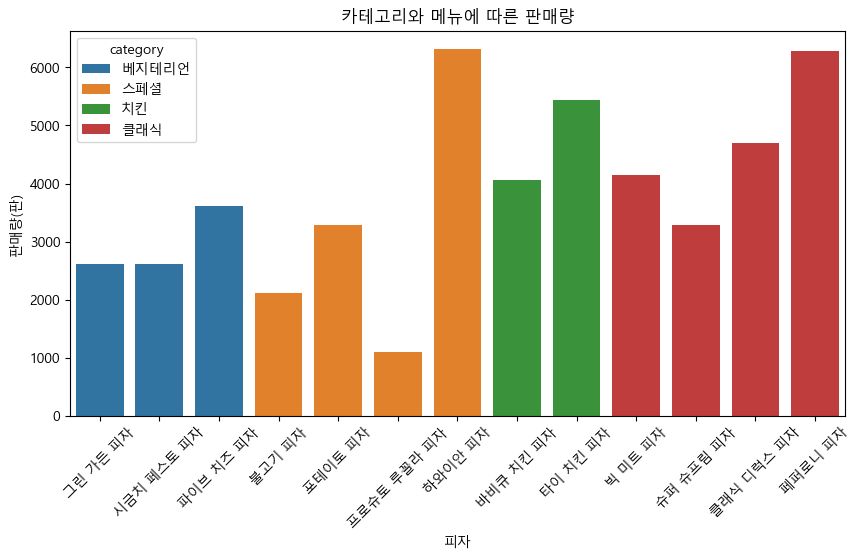

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(data=quantity_by_category_pizza, x='pizza_name', y='quantity', hue='category', dodge=False)  # dodge=False 너비를 줄이지 않는 설정
plt.xticks(rotation=45)
plt.title('카테고리와 메뉴에 따른 판매량')
plt.xlabel('피자')
plt.ylabel('판매량(판)')
plt.show()
# 스페셜 피자는 하와이안 피자만 많이 팔렸다.
# 클래식 피자와 치킨피자 판매량이 대체로 준수하다.
# 베지테리언 피자는 특정 고객층에게만 인기가 있는 듯 보인다.

In [40]:
price_df =  df.groupby(['pizza_name', 'size'])['price'].first().reset_index()   # 피자 가격표
category_df = df.groupby(['pizza_name'])['category'].first().reset_index()   # 피자 카테고리
price_category_df = price_df.merge(category_df, on='pizza_name', how='left')  # 두 df 병합
price_category_df.groupby('category')['price'].mean().reset_index().rename(columns={'price':'mean_price'})  # 카테고리별 피자 평균 가격은 다 비슷함

,category,mean_price
0,베지테리언,22788.888889
1,스페셜,21933.333333
2,치킨,23400.000000
3,클래식,20833.333333


## 매출 분석

### 전체 매출 분포

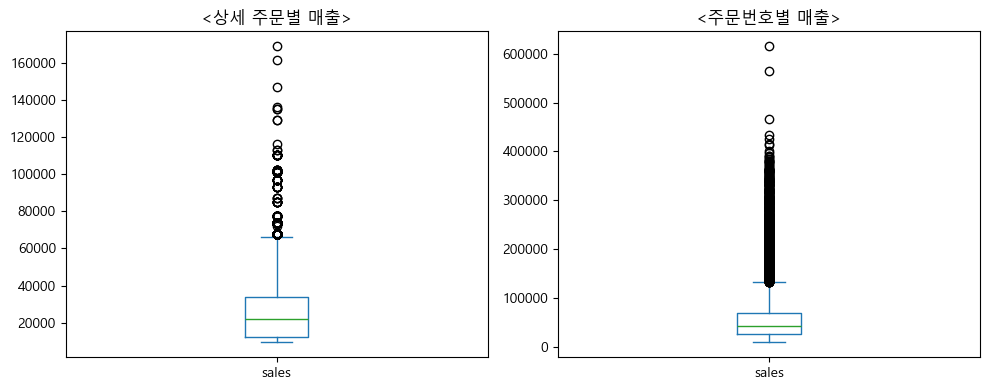

In [41]:
# 매출 간단하게 살펴보기
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['sales'].plot(kind='box')
plt.title("<상세 주문별 매출>")    # 하나의 주문에는 상세 주문이 있는데 이는 피자 종류를 구분한거라 보면 된다.

plt.subplot(1, 2, 2)
df.groupby('order_id')['sales'].sum().plot(kind='box')
plt.title("<주문번호별 매출>")
plt.tight_layout()
plt.show()

### 피자메뉴별 매출 비중

In [42]:
df.groupby('pizza_name')['sales'].sum().reset_index().sort_values('sales', ascending=False).head(5)

,pizza_name,sales
7,타이 치킨 피자,149899300
12,하와이안 피자,147470000
9,페퍼로니 피자,122438300
1,바비큐 치킨 피자,100283900
6,클래식 디럭스 피자,99222800


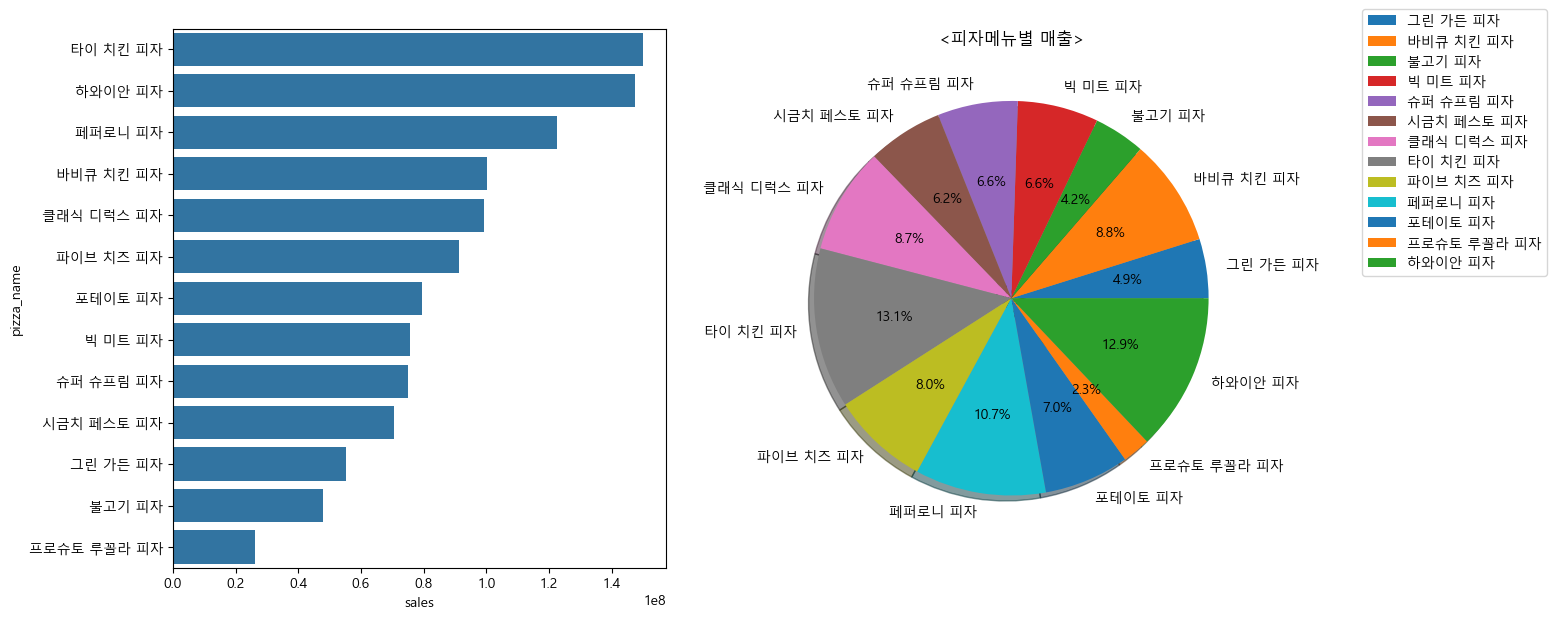

In [43]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(data=df.groupby('pizza_name')['sales'].sum().reset_index().sort_values('sales', ascending=False), x='sales', y='pizza_name')

plt.subplot(1, 2, 2)
plt.pie(df.groupby('pizza_name')['sales'].sum(), labels=df.groupby('pizza_name')['sales'].sum().index, autopct="%1.1f%%", shadow=True)
plt.title('<피자메뉴별 매출>')
plt.legend(labels=df.groupby('pizza_name')['sales'].sum().index, loc="upper right", bbox_to_anchor=(1.6, 1.1)) # bbox_to_anchor로 차트 바깥에 위치시키기

### 피자메뉴별 주문빈도 (각 메뉴를 얼마나 많은 사람이 찾았나)

In [44]:
df.groupby('pizza_name').size().reset_index().sort_values(0, ascending=False).head(5)

,pizza_name,0
12,하와이안 피자,5909
9,페퍼로니 피자,5906
7,타이 치킨 피자,5123
6,클래식 디럭스 피자,4496
3,빅 미트 피자,3905


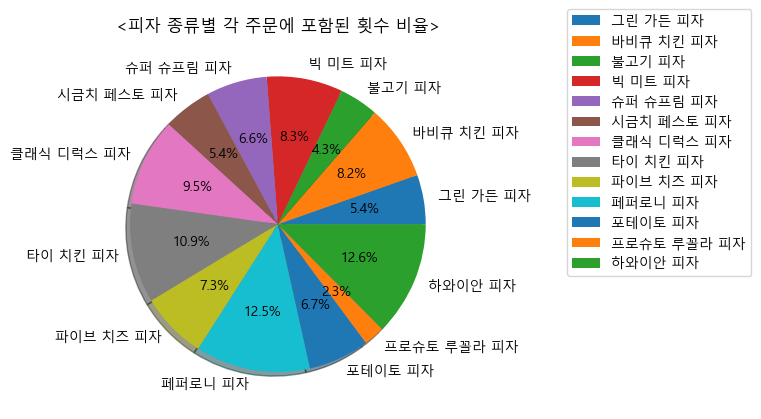

In [45]:
# df.groupby('pizza_name')['quantity'].sum()    # 이건 총 판매된 피자 총 개수에서 각각의 피자 비율
# df.groupby('pizza_name').size()               # 이건 피자가 얼마나 자주 팔렸는가를 나타냄(각 피자가 각 주문에 포함된 횟수를 의미함)

plt.pie(df.groupby('pizza_name').size(), labels=df.groupby('pizza_name').size().index, autopct="%1.1f%%", shadow=True)
plt.title('<피자 종류별 각 주문에 포함된 횟수 비율>')
plt.legend(labels=df.groupby('pizza_name').size().index, loc="upper right", bbox_to_anchor=(1.8, 1.1)) # bbox_to_anchor로 차트 바깥에 위치시키기
plt.show()

### 사이즈별 매출

In [46]:
df.groupby(['size', 'pizza_name'])['sales'].sum().reset_index().set_index('pizza_name').groupby('size')['sales'].idxmax().reset_index()
# 사이즈별로 가장 많은 매출을 올린 피자

,size,sales
0,L,타이 치킨 피자
1,M,페퍼로니 피자
2,S,빅 미트 피자


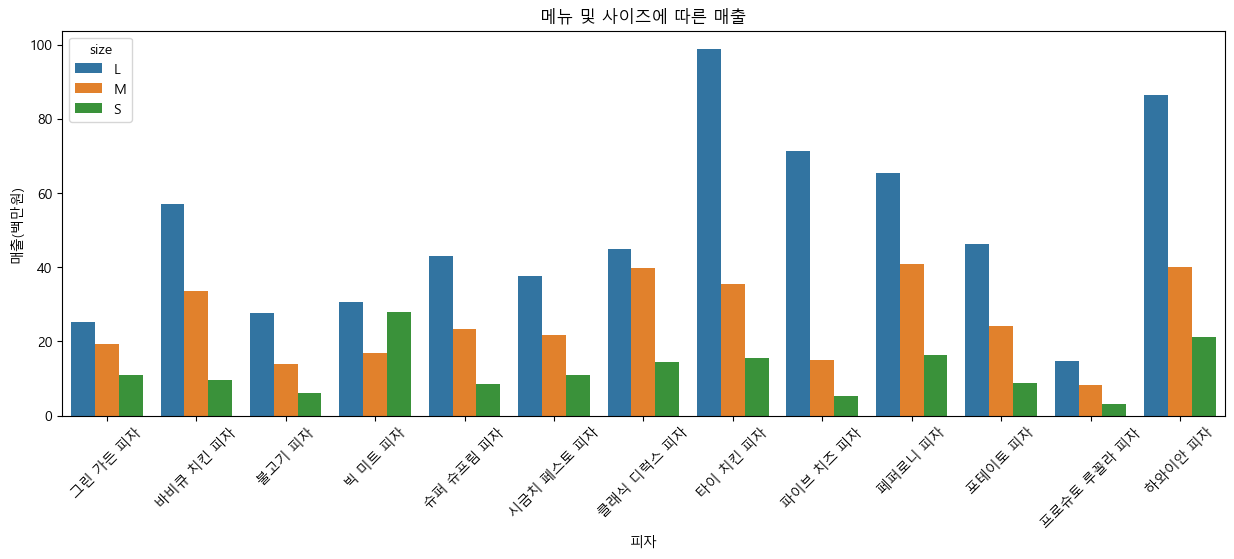

In [47]:
sales_by_pizza_and_size = df.groupby(['pizza_name', 'size'])['sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=sales_by_pizza_and_size, x='pizza_name', y='sales', hue='size')
plt.title('메뉴 및 사이즈에 따른 매출')
plt.xticks(rotation=45)
plt.xlabel('피자')
plt.ylabel('매출(백만원)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000000:,.0f}'))
plt.show()

## 각 재료 사용량 분석

In [48]:
df['ingredients']

0                            토마토, 베이컨, 파인애플, 모짜렐라 치즈
1                           베이컨, 토마토, 페퍼로니, 살라미, 초리조
2                        토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨
3        모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈
4               모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈
                            ...                     
47074               불고기, 불고기 소스, 버섯, 양파, 피망, 모짜렐라 치즈
47075           모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈
47076                페퍼로니, 토마토, 적양파, 그린 올리브, 옥수수, 마늘
47077               불고기, 불고기 소스, 버섯, 양파, 피망, 모짜렐라 치즈
47078                       치킨, 피망, 토마토, 적양파, 바비큐 소스
Name: ingredients, Length: 47079, dtype: object

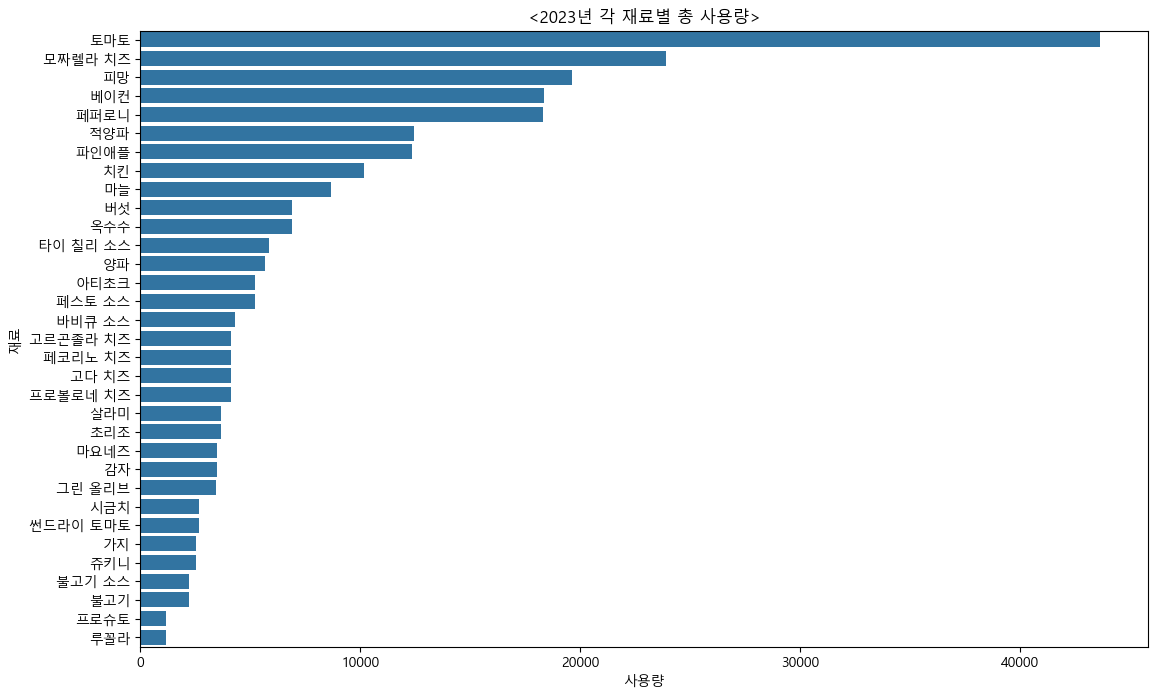

In [49]:
ingre = df.groupby(['ingredients', 'size'])['quantity'].sum().reset_index()   # 재료와 피자 사이즈별 총 주문 수량을 더한다.

size = pd.Series(data=[0.7, 1.0, 1.3], index=['S', 'M', 'L'])                 # 사이즈별 가중치를 달리하기 위해 임시로 시리즈를 만든다.
size.index.name = 'size'                                                      # 시리즈 이름을 설정해서 merge할때 간편하게 한다.
size.name = 'wgt'
size = size.reset_index()                                                     # 시리즈를 데이터 프레임으로 만든다.

ingre = ingre.merge(size, on='size', how='left')                              # ingre와 size를 합친다.
ingre['total'] = ingre['quantity'] * ingre['wgt']                             # total이라는 컬럼에 가중치와 총 주문 수량을 곱한다.
ingre_total = ingre.groupby('ingredients')['total'].sum().reset_index()       # 사이즈별 다른 가중치로 계산된 재료 수량을 다시 합친다.

ingre_dict = {}                                                               # 결과값으로 낼 개별 재료별 총 수량을 담을 사전을 정의한다.
ingre_series = ingre_total['ingredients'].str.split(", ")                     # 재료 컬럼에 개별 자료를 분리해서 각 재료에 접근할 수 있게 한다.
for i in range(ingre_series.size):                                            # 앞서 병합한 데이터프레임을 한 행씩 반복문으로 돌면서 개별 재료 개수를 사전에 담는다.
    for j in ingre_series[i]:
        if j in ingre_dict: ingre_dict[j] += ingre_total['total'][i]
        else: ingre_dict[j] = ingre_total['total'][i]

index = list(ingre_dict.keys())                                               # 결과로 나온 사전을 데이터 프레임으로 만들어준다.
value = list(ingre_dict.values())
result = pd.Series(value, index=index)
result.index.name = 'ingredient'
result.name = 'count'
result_df = result.reset_index()

plt.figure(figsize=(13, 8))
sns.barplot(data=result_df.sort_values('count', ascending=False), y='ingredient', x='count')
plt.xlabel("사용량")
plt.xticks(rotation=0)
plt.ylabel("재료")
plt.title("<2023년 각 재료별 총 사용량>")
plt.show()

## 각 재료 사용량 분석 (다른 방법)

In [50]:
# 위 코드와 비교해서 더 간단한 방식(explode 함수 사용)
df2 = df.copy()
df2['ingredients_handled'] = df2['ingredients'].str.split(', ')
df2 = df2.explode('ingredients_handled')  # 하와이안 피자의 재료 개수만큼 row를 늘린다.
df2.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,price,category,ingredients,sales,month,day_name,hour,type_of_day,ingredients_handled
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,토마토
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,베이컨
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,파인애플
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,모짜렐라 치즈
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조",34000,1,6,11,휴일,베이컨


In [51]:
size_weights = {'S': 1, 'M': 2, 'L': 3}  # 가중치 1, 2, 3으로 둔다.

df2['weighted_quantity'] = df2.apply(lambda row: row['quantity'] * size_weights[row['size']], axis=1)

df2.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,price,category,ingredients,sales,month,day_name,hour,type_of_day,ingredients_handled,weighted_quantity
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,토마토,2
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,베이컨,2
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,파인애플,2
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",21800,1,6,11,휴일,모짜렐라 치즈,2
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조",34000,1,6,11,휴일,베이컨,3


In [52]:
ingredient_usage = df2.groupby('ingredients_handled')['weighted_quantity'].sum().reset_index()
ingredient_usage_sorted = ingredient_usage.sort_values('weighted_quantity', ascending=False)
ingredient_usage_sorted.head()

,ingredients_handled,weighted_quantity
25,토마토,88428
8,모짜렐라 치즈,49393
32,피망,40181
11,베이컨,36562
29,페퍼로니,36402


In [53]:
used_pizzas = df2.groupby('ingredients_handled')['pizza_name'].unique().reset_index()
used_pizzas.head()

,ingredients_handled,pizza_name
0,가지,[그린 가든 피자]
1,감자,[포테이토 피자]
2,고다 치즈,[파이브 치즈 피자]
3,고르곤졸라 치즈,[파이브 치즈 피자]
4,그린 올리브,[슈퍼 슈프림 피자]


In [54]:
ingredient_usage_and_pizzas = pd.merge(ingredient_usage_sorted, used_pizzas, how='left', on='ingredients_handled')
ingredient_usage_and_pizzas.head()

,ingredients_handled,weighted_quantity,pizza_name
0,토마토,88428,"[하와이안 피자, 빅 미트 피자, 클래식 디럭스 피자, 포테이토 피자, 타이 치킨 ..."
1,모짜렐라 치즈,49393,"[하와이안 피자, 파이브 치즈 피자, 포테이토 피자, 페퍼로니 피자, 프로슈토 루꼴..."
2,피망,40181,"[클래식 디럭스 피자, 타이 치킨 피자, 바비큐 치킨 피자, 그린 가든 피자, 불고..."
3,베이컨,36562,"[하와이안 피자, 빅 미트 피자, 클래식 디럭스 피자, 포테이토 피자]"
4,페퍼로니,36402,"[빅 미트 피자, 클래식 디럭스 피자, 페퍼로니 피자, 슈퍼 슈프림 피자]"


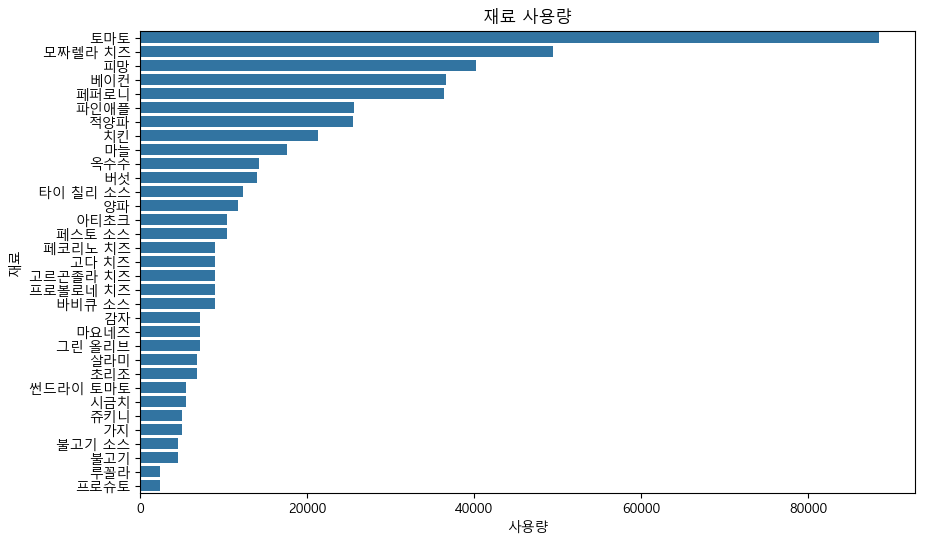

In [55]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.barplot(data=ingredient_usage_sorted, x='weighted_quantity', y='ingredients_handled')
plt.title('재료 사용량')
plt.xlabel('사용량')
plt.ylabel('재료')
plt.show()